In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LeakyReLU, Flatten, Dropout, BatchNormalization, Activation, LSTM
from pandas import read_excel, DataFrame, Series
from scikeras.wrappers import KerasClassifier, KerasRegressor
# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor --depricated
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings



import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)

2.12.0


In [56]:
df_matrix = pd.read_csv('Datasets/df_clean.csv')
df.head(2)

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1,1.857143,2030.0,738.736842,50.0,23.75,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.0,21.25,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0


In [69]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [57]:
df_matrix.shape

(921, 14)

In [58]:
target_matrix = df_matrix['Соотношение матрица-наполнитель']
train_matrix = df_matrix.drop(['Соотношение матрица-наполнитель', 'Unnamed: 0'], axis=1)

In [59]:
target_matrix.head(2)

0    1.857143
1    1.857143
Name: Соотношение матрица-наполнитель, dtype: float64

In [60]:
train_matrix.head(2)

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,2030.0,738.736842,50.0,23.75,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,2030.0,738.736842,129.0,21.25,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(train_matrix, target_matrix, test_size = 0.3, random_state = 17)

In [62]:
# нормализуем входные данные и преобразуем в np.array
x_train_n = tf.keras.layers.Normalization(axis =-1)
x_train_n.adapt(np.array(x_train))

In [71]:
model = Sequential(x_train_n)

model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(32))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(32))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(1))
model.add(Activation(activation='elu'))

In [72]:
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),loss='mean_absolute_error')

In [74]:
%%time
history = model.fit(x_train, y_train,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
9/9 [==============================] - 3s 84ms/step - loss: 2.8287 - val_loss: 2.9627
Epoch 2/40
9/9 [==============================] - 0s 9ms/step - loss: 2.2510 - val_loss: 2.7586
Epoch 3/40
9/9 [==============================] - 0s 9ms/step - loss: 1.7600 - val_loss: 2.6759
Epoch 4/40
9/9 [==============================] - 0s 9ms/step - loss: 1.2923 - val_loss: 2.0508
Epoch 5/40
9/9 [==============================] - 0s 25ms/step - loss: 0.8726 - val_loss: 0.9830
Epoch 6/40
9/9 [==============================] - 0s 14ms/step - loss: 0.7604 - val_loss: 0.9028
Epoch 7/40
9/9 [==============================] - 0s 11ms/step - loss: 0.7389 - val_loss: 1.0054
Epoch 8/40
9/9 [==============================] - 0s 9ms/step - loss: 0.7441 - val_loss: 1.0412
Epoch 9/40
9/9 [==============================] - 0s 10ms/step - loss: 0.7090 - val_loss: 0.9030
Epoch 10/40
9/9 [==============================] - 0s 29ms/step - loss: 0.7133 - val_loss: 0.9189
Epoch 11/40
9/9 [================

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)              

In [80]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='violet', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.show()

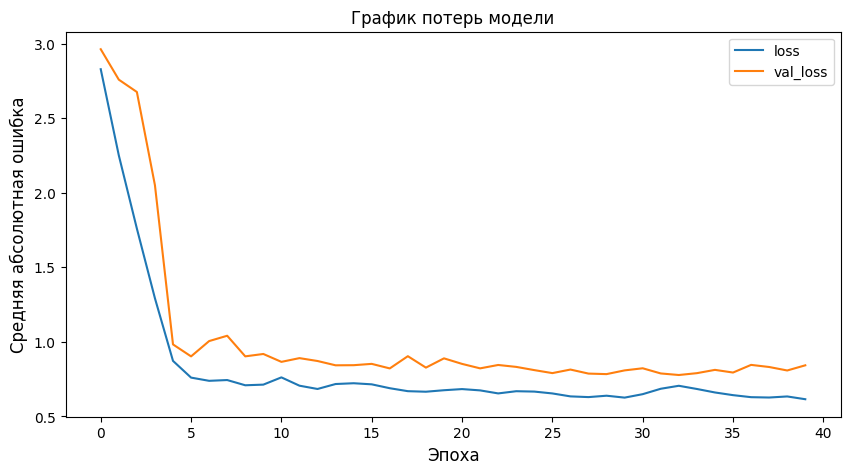

In [81]:
model_loss_plot(history)

9/9 [==============================] - 0s 4ms/step


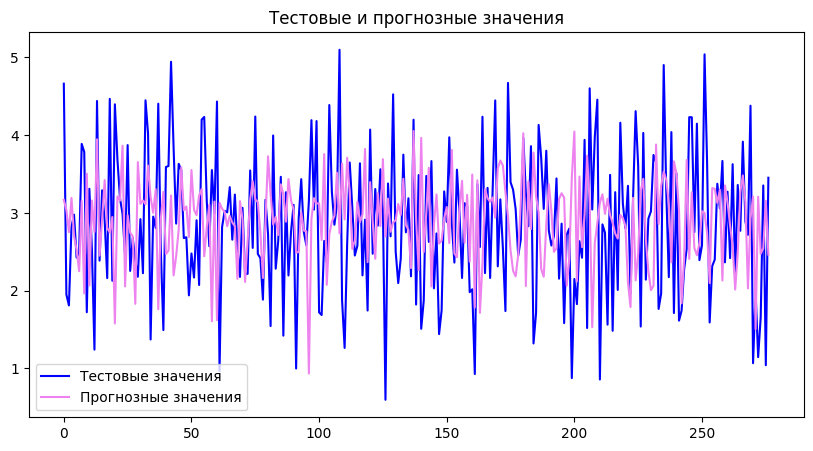

In [82]:
predicted = model.predict(np.array((x_test)))
original = y_test.values

actual_and_predicted_plot(original, predicted)

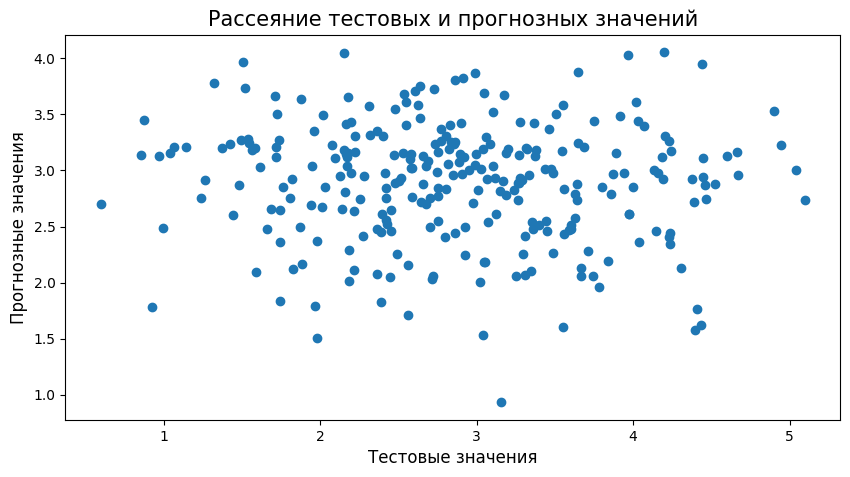

In [83]:
actual_and_predicted_scatter(original, predicted)

In [84]:
print(f'Model MAE: {model.evaluate(x_test, y_test, verbose=1)}')

9/9 [==============================] - 0s 5ms/step - loss: 0.8615
Model MAE: 0.8614529371261597


In [85]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test-np.mean(y_test)))}')

MAE среднего значения: 0.7307428934992544


In [86]:
model2 = Sequential(x_train_n)

model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(LeakyReLU())
model2.add(Dense(128, activation='selu'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='selu'))
model2.add(BatchNormalization())
model2.add(Dense(32, activation='selu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU())
model2.add(Dense(16, activation='selu'))
model2.add(BatchNormalization())
model2.add(Dense(1))
model2.add(Activation('selu'))

In [87]:
early_model2 = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [88]:
model2.compile(optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5), loss='mean_absolute_error')

In [89]:
%%time
history2 = model2.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_model2]
    )

Epoch 1/100
9/9 [==============================] - 2s 42ms/step - loss: 2.6899 - val_loss: 3.2351
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 1.8445 - val_loss: 2.7415
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 1.0060 - val_loss: 1.4457
Epoch 4/100
9/9 [==============================] - 0s 11ms/step - loss: 0.7381 - val_loss: 1.2857
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.8059 - val_loss: 1.1990
Epoch 6/100
9/9 [==============================] - 0s 15ms/step - loss: 0.8136 - val_loss: 1.0246
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 0.7395 - val_loss: 1.0924
Epoch 8/100
9/9 [==============================] - 0s 10ms/step - loss: 0.7396 - val_loss: 0.8536
Epoch 9/100
9/9 [==============================] - 0s 13ms/step - loss: 0.6993 - val_loss: 0.8373
Epoch 10/100
9/9 [==============================] - 0s 17ms/step - loss: 0.7036 - val_loss: 0.8421
Epoch 11/100
9/9 [=

In [90]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_13 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_11 (Bat  (None, 128)             

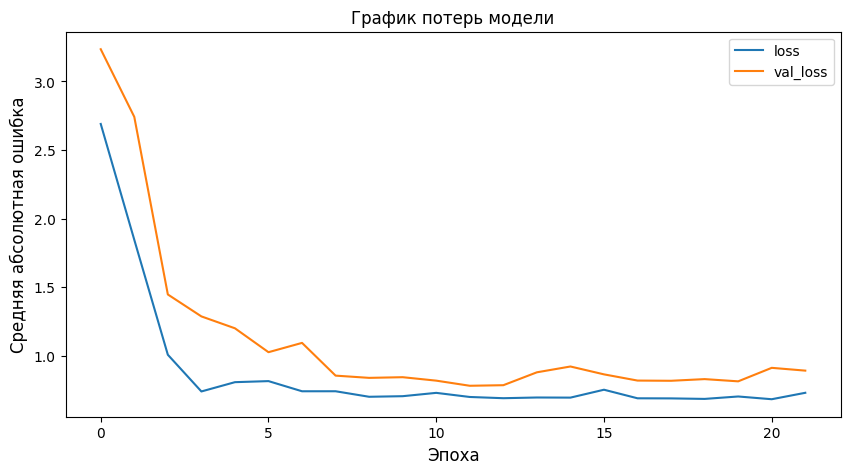

In [91]:
model_loss_plot(history2)

9/9 [==============================] - 1s 3ms/step


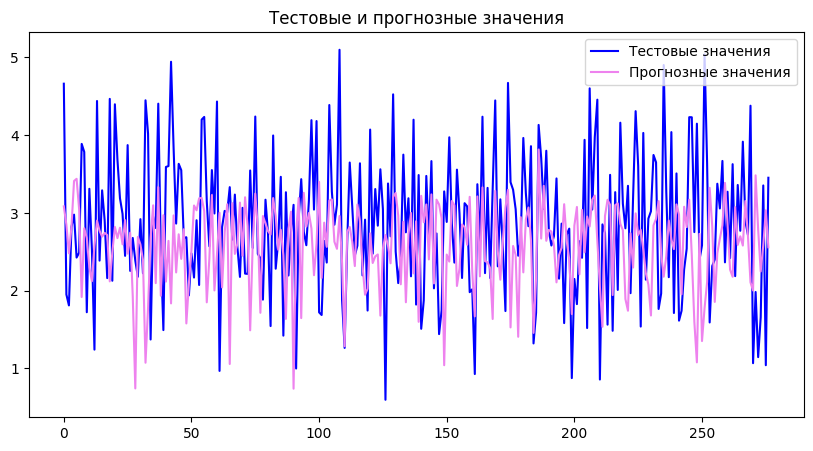

In [92]:
predicted2 = model2.predict(np.array((x_test)))
original2 = y_test.values

actual_and_predicted_plot(original2, predicted2)

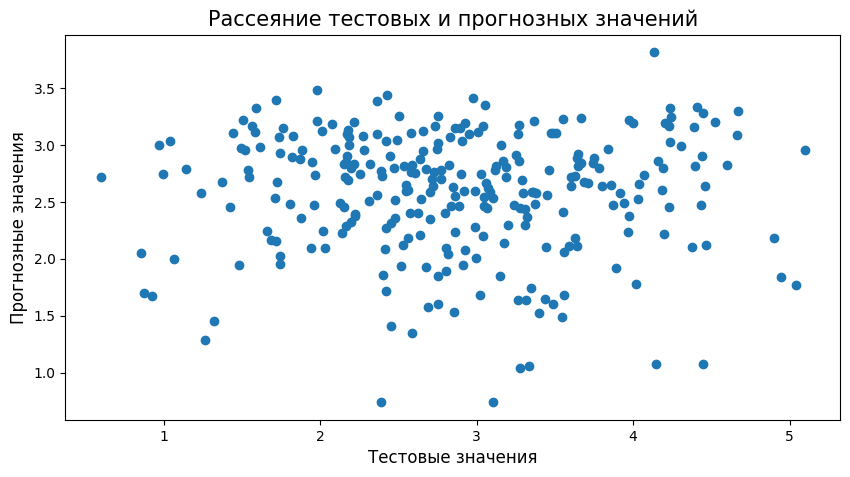

In [93]:
actual_and_predicted_scatter(original2, predicted2)

In [94]:
print(f'Model MAE: {model2.evaluate(x_test, y_test)}')

9/9 [==============================] - 0s 4ms/step - loss: 0.8825
Model MAE: 0.8825016021728516


In [95]:
print(f'MAE среднего значения: {np.mean(np.abs(y_test-np.mean(y_test)))}')

MAE среднего значения: 0.7307428934992544
